In [ ]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle
import pandas as pd
from exported import tags_len, parse_tags

In [ ]:
upstream = ['parsing-jsons-into-a-data-frame']
product = None

In [ ]:
df = pd.read_parquet(upstream['parsing-jsons-into-a-data-frame']['df'])

## Tags

- `tags` contain classifiers for each song
- It's a list of (key, value) tuples. Example: (rock, 100)
- The median is a single tag
- There is an outlier with 100 tags

In [11]:
df.tags.sample(n=10)

1724     [[dance, 100], [techno, 85], [trance, 57], [fe...
51063                                        [[80's, 100]]
1668     [[hardcore, 100], [italian, 50], [old school, ...
69177                                     [[country, 100]]
43543                                                   []
28514    [[new age, 100], [chillout, 85], [electronic, ...
2531     [[90s, 100], [chanson, 100], [00s, 100], [2000...
12673                                                   []
82607                                                   []
6239     [[pop, 100], [world, 100], [arabic, 100], [leb...
Name: tags, dtype: object

In [12]:
def tags_len(tags):
    return len(tags)         

df['tags_len'] = df.tags.apply(tags_len)

There's a long tail of tags:

In [13]:
df['tags_len'].describe()

count    104212.000000
mean          8.900098
std          19.201691
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max         100.000000
Name: tags_len, dtype: float64

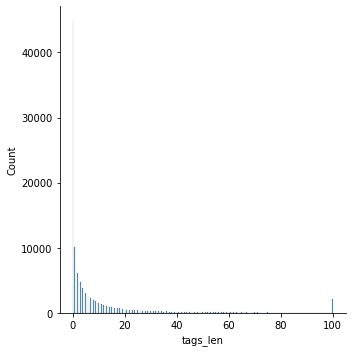

In [14]:
sns.displot(df['tags_len'])

In [15]:
def parse_tags(tags):
    if not tags:
        return {}
    
    # we'll only process the first three     
    to_process = tags[:3]
    
    # convert: [[key0, value0], [key1, value1], ...]
    # into: [key0, key1, ...], [value0, value1, ...], 
    keys, values = zip(*to_process[:3])
    
    # convert to: column_name: key
    keys_mapping = {f'tag_{i}': k for i, k in enumerate(keys)}
    # convert to: column_name: value
    values_mapping = {f'value_{i}': k for i, k in enumerate(values)}
    
    return {**keys_mapping, **values_mapping}

In [16]:
df_tags = pd.DataFrame.from_records(df.tags.apply(parse_tags))
df_tags.head()

,tag_0,value_0,tag_1,tag_2,value_1,value_2
0,NaN,NaN,NaN,NaN,NaN,NaN
1,house set,100,NaN,NaN,NaN,NaN
2,Love,100,noise,going crazy,100,100
3,freejazz,100,NaN,NaN,NaN,NaN
4,singer-songwriter,100,60s,NaN,100,NaN


In [17]:
df_tagged = df.join(df_tags)

In [ ]:
Path(product['df']).parent.mkdir(exist_ok=True, parents=True)
df.to_parquet(product['df'], index=False)

Path(product['df_tagged']).parent.mkdir(exist_ok=True, parents=True)
df_tagged.to_parquet(product['df_tagged'], index=False)